<a href="https://colab.research.google.com/github/kibarmustofa/2341720034_ML_2025/blob/main/JS05/TG_JS05_2341720034_Kibar_Mustofa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : Kibar Mustofa

KELAS: TI-3F

NO : 17

#Tugas Pratikum
## 1. Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Apakah sebaran data dapat dikatakan linier?

In [ ]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Load dan inspeksi data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SC Matkul Machine learning/CC_Customer_Dataset.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


Slice data & plot

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
# Slice data
X = df.iloc[:, 2:] # hapus 2 fitur s1 no sama customer key

standarisasi

In [ ]:
# Standarisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.dtype)

float64


menampilkan hasil standarisasi

In [ ]:
print(X)

[[ 1.74018685 -1.24922476 -0.86045063 -0.54748969 -1.25153737]
 [ 0.41029254 -0.78758515 -1.47373077  2.5205186   1.89185881]
 [ 0.41029254  1.05897329 -0.86045063  0.13428993  0.1455276 ]
 ...
 [ 2.93709172  1.5206129  -0.86045063  2.17962879 -0.90227113]
 [ 3.65523464  2.44389211 -0.86045063  4.22496765 -1.25153737]
 [ 3.52224521  1.9822525  -1.47373077  3.20229822 -0.55300488]]


menampilkan hasil scatter plot antara avg_credit_limit dan total_credit_cards

Text(0, 0.5, 'Total_Credit_Cards')

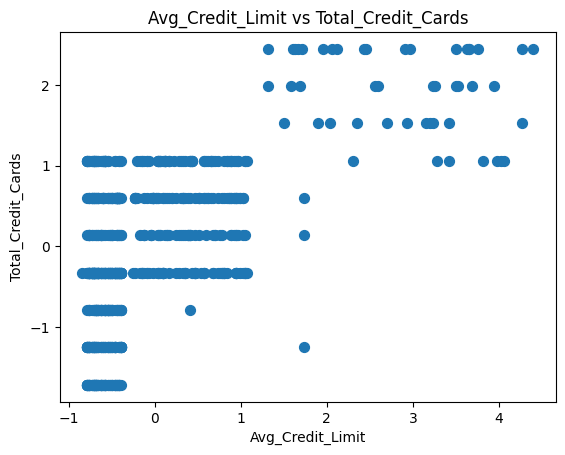

In [ ]:
plt.scatter(X[:,0], X[:,1], s = 50)
plt.title('Avg_Credit_Limit vs Total_Credit_Cards')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')

### Apakah sebaran data dapat dikatakan linier?

- saya berpikir ketika pada scatter berikut diberi garis linear regrasi hasilnya belum linear sempurna tapi saya berfikir masih termasuk linear


##2. Buatlah model klasterisasi dengan menggunakan model K-Means. Tentukan jumlah k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.


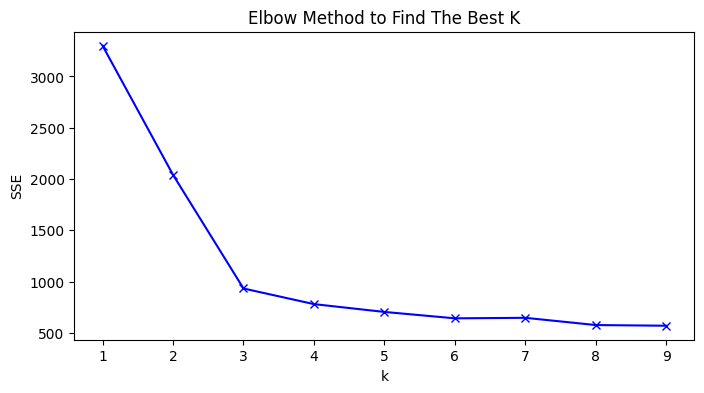

In [ ]:
# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

nilai sse

In [ ]:
print(f'Nilai SSE: {kmeanModel.inertia_}')

Nilai SSE: 570.083624207547


Berdasarkan hasil lineplot SSE untuk setiap k, nilai k terbaik adalah 3, karena tidak ada perubahan yang selalu signifikan setelahnya.

##3. Gambarkan hasil klasterisasi dengan model K-Means dengan menggunakan scatterplot.


In [ ]:
# Build a K-Means Model
# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=3)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

menampilkan scaterplot

Text(0, 0.5, 'Total_Credit_Cards')

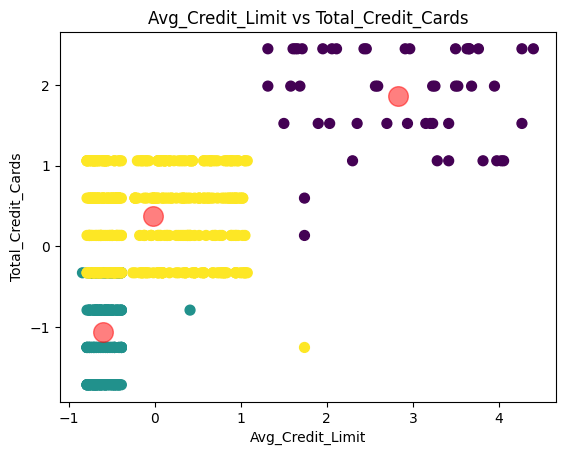

In [ ]:
# plt.scatter(X.iloc[:, 0], X.iloc[:,1], s = 50, c=y_kmeans)
plt.scatter(X[:, 0], X[:,1], s = 50, c=y_kmeans)
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='red', s=200, alpha=0.5);
plt.title('Avg_Credit_Limit vs Total_Credit_Cards')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Cards')

4. Buatlah model klasterisasi dengan menggunakan DBSCAN dengan seluruh variabel yang dapat digunakan.

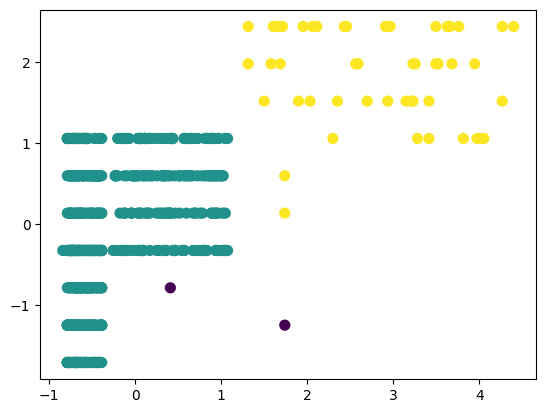

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.3, min_samples=2)
cluster_db = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_db, s=50, cmap='viridis')

5. Tentukan jumlah k yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.


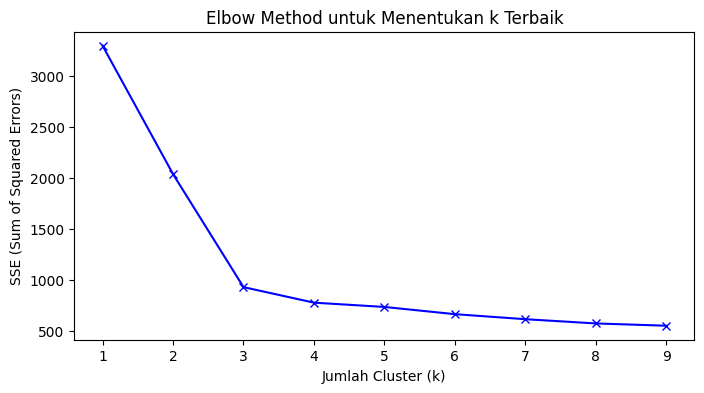

In [ ]:
sse = []

K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Elbow Method untuk Menentukan k Terbaik")
plt.show()

Berdasarkan hasil lineplot SSE untuk setiap k, nilai k terbaik adalah 3, karena tidak ada perubahan yang selalu signifikan setelahnya karena menampilkan perubahan yang cukup tajam kemudian diikuti penurunan stabil.



##6. Tentukan nilai silhouette score dan DBI dari model DBSCAN.


In [ ]:
#silhouette lib
from sklearn.metrics import silhouette_score

print(silhouette_score(X, cluster_db))

0.36060960687076654
